# Imports and function definitions

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import glob
%matplotlib inline
mpl.style.use('default')

def read_10s_data():
    """
    Reads in the file paths and dwelling id's of the smartmeter data.
    :return: file_paths, dwelling_ids, both as lists.
    """
    path = '//datc//opschaler//combined_gas_smart_weather_dfs//processed'
    file_paths = np.array(glob.glob(path + "/*_10s.csv"))

    print('Detected %s files.' % len(file_paths))
    dwelling_ids = np.array(list((map(lambda x: x[-19:-8], file_paths))))

    return file_paths, dwelling_ids

def read_hour_data():
    """
    Reads in the file paths and dwelling id's of the smartmeter data.
    :return: file_paths, dwelling_ids, both as lists.
    """
    path = '//datc//opschaler//combined_gas_smart_weather_dfs//processed'
    file_paths = np.array(glob.glob(path + "/*_hour.csv"))

    print('Detected %s files.' % len(file_paths))
    dwelling_ids = np.array(list((map(lambda x: x[-20:-9], file_paths))))

    return file_paths, dwelling_ids

def create_corr_matrix(df, dwelling_id, annot):
    """
    Pearson correlation coefficient matrix. 
    The Pearson correlation coefficient is a measure of the linear correlation between two variables.
    """
    plt.clf()
    
    corr = s.corr()
    mask = np.zeros_like(s.corr())
    mask[np.triu_indices_from(mask)] = True

    if annot:
        fig, ax = plt.subplots(figsize=(25,25))
    else:
        fig, ax = plt.subplots()

    fig = sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=annot, ax=ax, 
                cbar_kws={'label':'Pearson correlation coefficient [-]'})

    fig.set_title('Correlation matrix of dwelling ID: '+dwelling_id)
    fig.tick_params(axis='x', rotation=90)
    fig.tick_params(axis='y', rotation=0)

    fig = fig.get_figure()
    fig.tight_layout()
    fig.show()
    
    if annot:
        fig.savefig('//datc//opschaler//EDA//Pearson_corr//' + dwelling_id + '_large.png', dpi=300)
    else:
        fig.savefig('//datc//opschaler//EDA//Pearson_corr//' + dwelling_id + '.png', dpi=300)
    
    return fig

# Read the file paths and dwelling IDs

In [2]:
file_paths_10s, dwelling_ids_10s = read_10s_data()

Detected 38 files.


In [3]:
dwelling_ids_10s

array(['P01S01W7548', 'P01S01W8239', 'P01S01W5588', 'P01S02W5065',
       'P01S02W4827', 'P01S01W4589', 'P01S01W5476', 'P01S01W0001',
       'P01S01W7071', 'P01S01W3497', 'P01S02W4953', 'P01S01W5040',
       'P01S01W9431', 'P01S01W6495', 'P01S01W4489', 'P01S01W8171',
       'P01S01W4002', 'P01S01W5564', 'P01S02W0167', 'P01S01W6595',
       'P01S01W0373', 'P01S02W2995', 'P01S01W8655', 'P01S01W6271',
       'P01S01W5292', 'P01S01W6959', 'P01S01W4979', 'P01S01W4313',
       'P01S01W5855', 'P01S01W2581', 'P01S01W4569', 'P01S01W1341',
       'P01S01W7042', 'P01S01W6835', 'P01S01W0998', 'P01S01W1347',
       'P01S01W5339', 'P01S01W4091'], 
      dtype='<U11')

In [4]:
file_paths_hour, dwelling_ids_hour = read_hour_data()

Detected 38 files.


In [5]:
dwelling_ids_hour

array(['P01S01W7548', 'P01S02W0167', 'P01S01W5040', 'P01S01W5588',
       'P01S01W9431', 'P01S01W4002', 'P01S01W7042', 'P01S01W5476',
       'P01S02W4827', 'P01S01W6271', 'P01S01W5339', 'P01S01W1341',
       'P01S01W5564', 'P01S01W2581', 'P01S01W5292', 'P01S01W8655',
       'P01S01W0998', 'P01S01W4979', 'P01S01W6959', 'P01S01W4091',
       'P01S01W0373', 'P01S02W4953', 'P01S01W6595', 'P01S01W4489',
       'P01S01W5855', 'P01S01W4313', 'P01S01W6835', 'P01S01W8239',
       'P01S01W1347', 'P01S01W8171', 'P01S01W7071', 'P01S01W3497',
       'P01S01W6495', 'P01S02W2995', 'P01S01W4589', 'P01S01W0001',
       'P01S01W4569', 'P01S02W5065'], 
      dtype='<U11')

# Iterate over the dwellings

---------- iteration 0 out of 38 ----------
Selected dwelling_ID: P01S01W7548


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


---------- iteration 1 out of 38 ----------
Selected dwelling_ID: P01S01W8239
---------- iteration 2 out of 38 ----------
Selected dwelling_ID: P01S01W5588
---------- iteration 3 out of 38 ----------
Selected dwelling_ID: P01S02W5065
---------- iteration 4 out of 38 ----------
Selected dwelling_ID: P01S02W4827
---------- iteration 5 out of 38 ----------
Selected dwelling_ID: P01S01W4589
---------- iteration 6 out of 38 ----------
Selected dwelling_ID: P01S01W5476
---------- iteration 7 out of 38 ----------
Selected dwelling_ID: P01S01W0001
---------- iteration 8 out of 38 ----------
Selected dwelling_ID: P01S01W7071
---------- iteration 9 out of 38 ----------
Selected dwelling_ID: P01S01W3497


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


---------- iteration 10 out of 38 ----------
Selected dwelling_ID: P01S02W4953
---------- iteration 11 out of 38 ----------
Selected dwelling_ID: P01S01W5040
---------- iteration 12 out of 38 ----------
Selected dwelling_ID: P01S01W9431
---------- iteration 13 out of 38 ----------
Selected dwelling_ID: P01S01W6495
---------- iteration 14 out of 38 ----------
Selected dwelling_ID: P01S01W4489
---------- iteration 15 out of 38 ----------
Selected dwelling_ID: P01S01W8171
---------- iteration 16 out of 38 ----------
Selected dwelling_ID: P01S01W4002
---------- iteration 17 out of 38 ----------
Selected dwelling_ID: P01S01W5564
---------- iteration 18 out of 38 ----------
Selected dwelling_ID: P01S02W0167
---------- iteration 19 out of 38 ----------
Selected dwelling_ID: P01S01W6595
---------- iteration 20 out of 38 ----------
Selected dwelling_ID: P01S01W0373
---------- iteration 21 out of 38 ----------
Selected dwelling_ID: P01S02W2995
---------- iteration 22 out of 38 ----------
Selecte

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

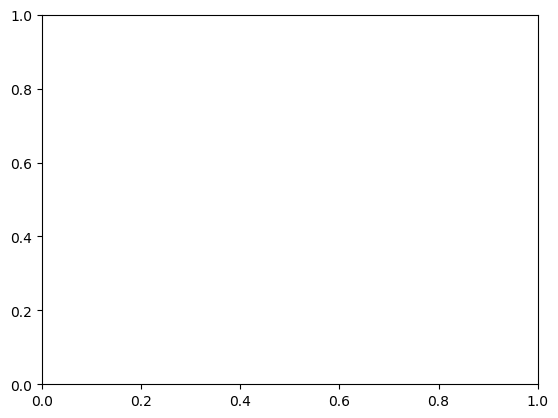

In [6]:
#dwelling_ids_hour = dwelling_ids_hour[20:30]

for i, dwelling in enumerate(dwelling_ids_hour):
    print('---------- iteration %s out of %s ----------' % (i, len(dwelling_ids_hour)))
    dwelling_id = dwelling_ids_10s[i]
    file_path = file_paths_hour[i]
    
    print('Selected dwelling_ID: '+dwelling_id)
    s = pd.read_csv(file_path, delimiter='\t', parse_dates=['datetime'])
    s = s.set_index(['datetime'])
    
    # Do stuff from here on, for example apply the create_corr_matrix() function.
    create_corr_matrix(s, dwelling_id+' 10s', False)
    create_corr_matrix(s, dwelling_id+' 10s', True)

print('---------- DONE')